In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='retina'

rcParams['figure.figsize'] = 13,8

### Задача 1. Возьмите датасет Mortality and Water Hardness

In [2]:
water = pd.read_csv('water.csv')
water = water.drop(['Unnamed: 0'], axis = 1)

In [10]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


### Задача 2. Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

Проверим распределение данных

<AxesSubplot:ylabel='Frequency'>

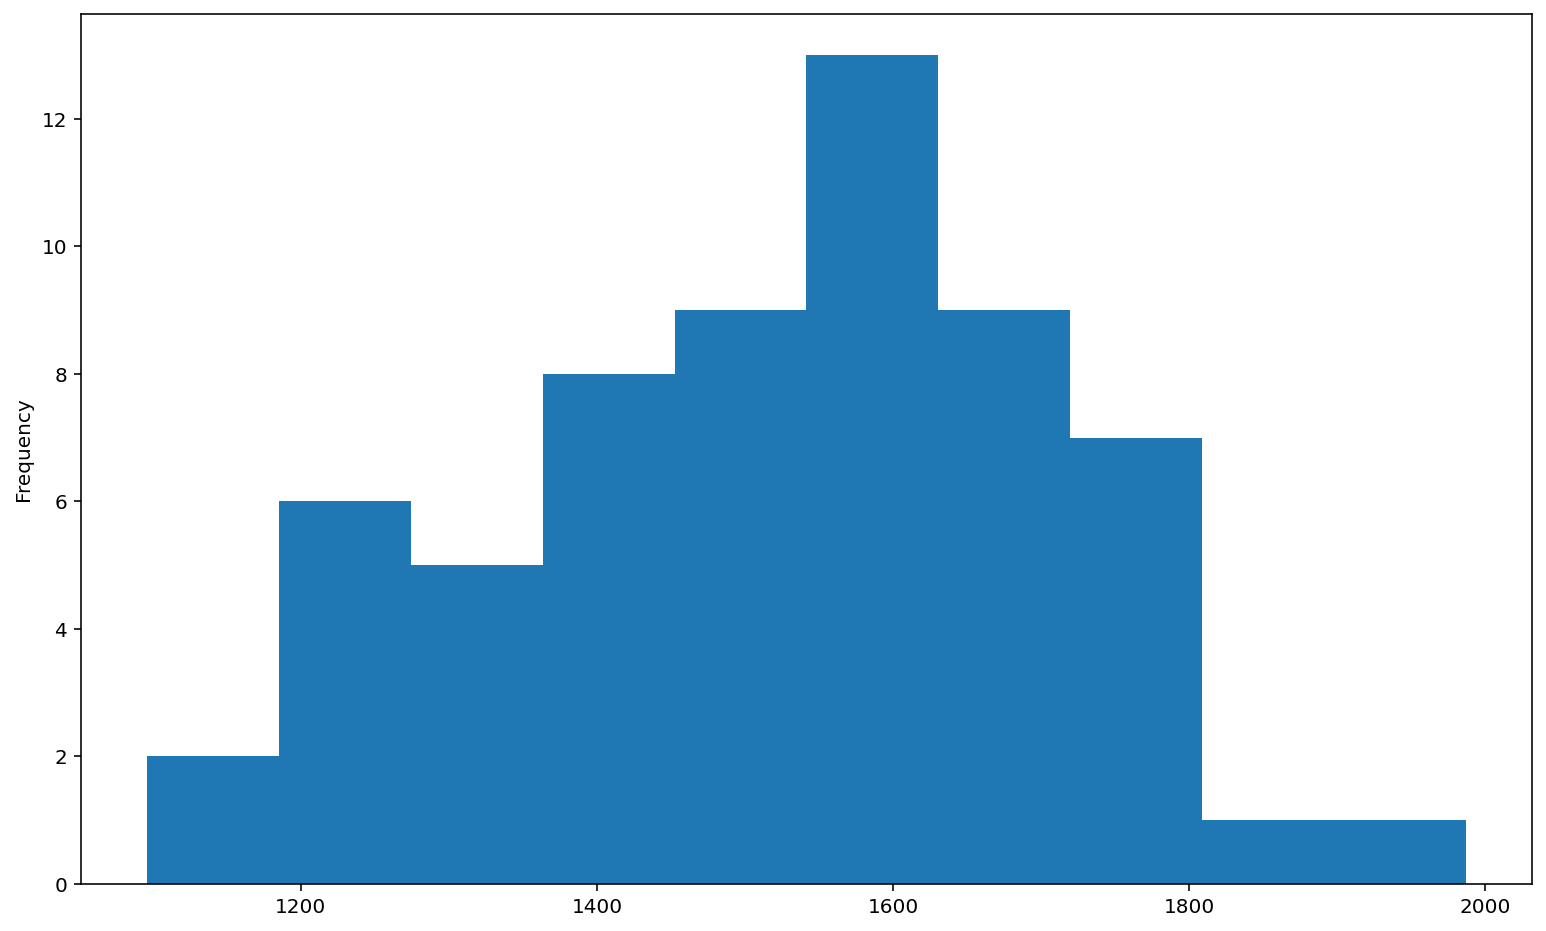

In [20]:
water['mortality'].plot.hist()

Данные о средней годовой смертности на 100,000 населения имеют достаточно четко выраженное нормальное распределение

<AxesSubplot:ylabel='Frequency'>

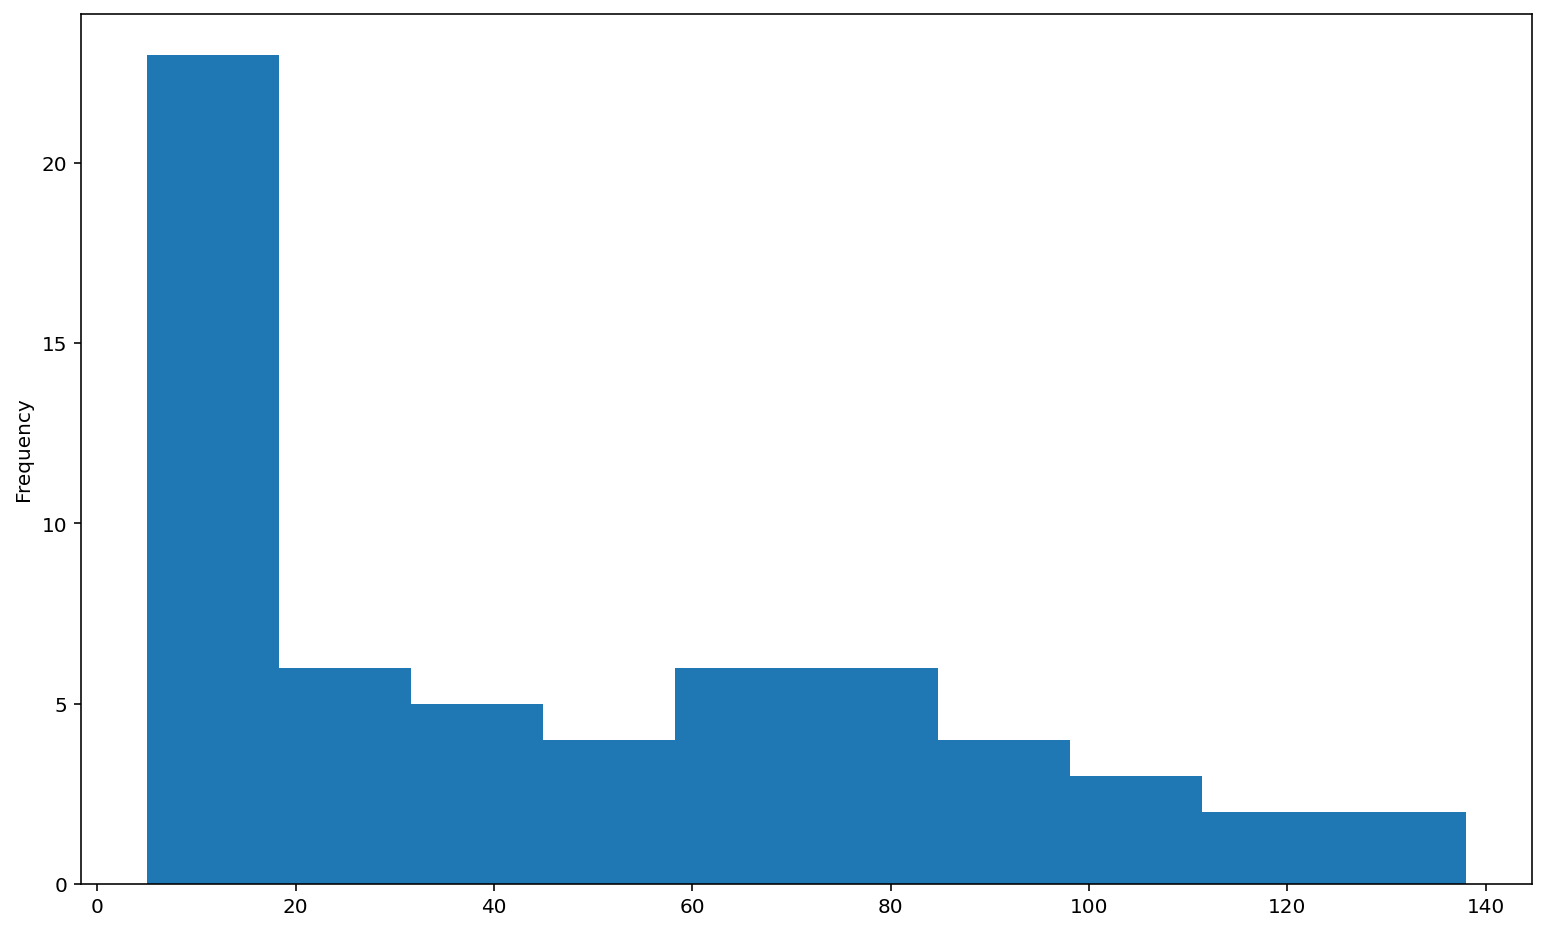

In [21]:
water['hardness'].plot.hist()

Данные о концентрации кальция в питьевой воде не похожи на нормальное распределение (или оно очень слабо выраженное, без левого хвоста). Возможно, коэффициент корреляции Пирсона будет давать недостаточно хороший результат

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

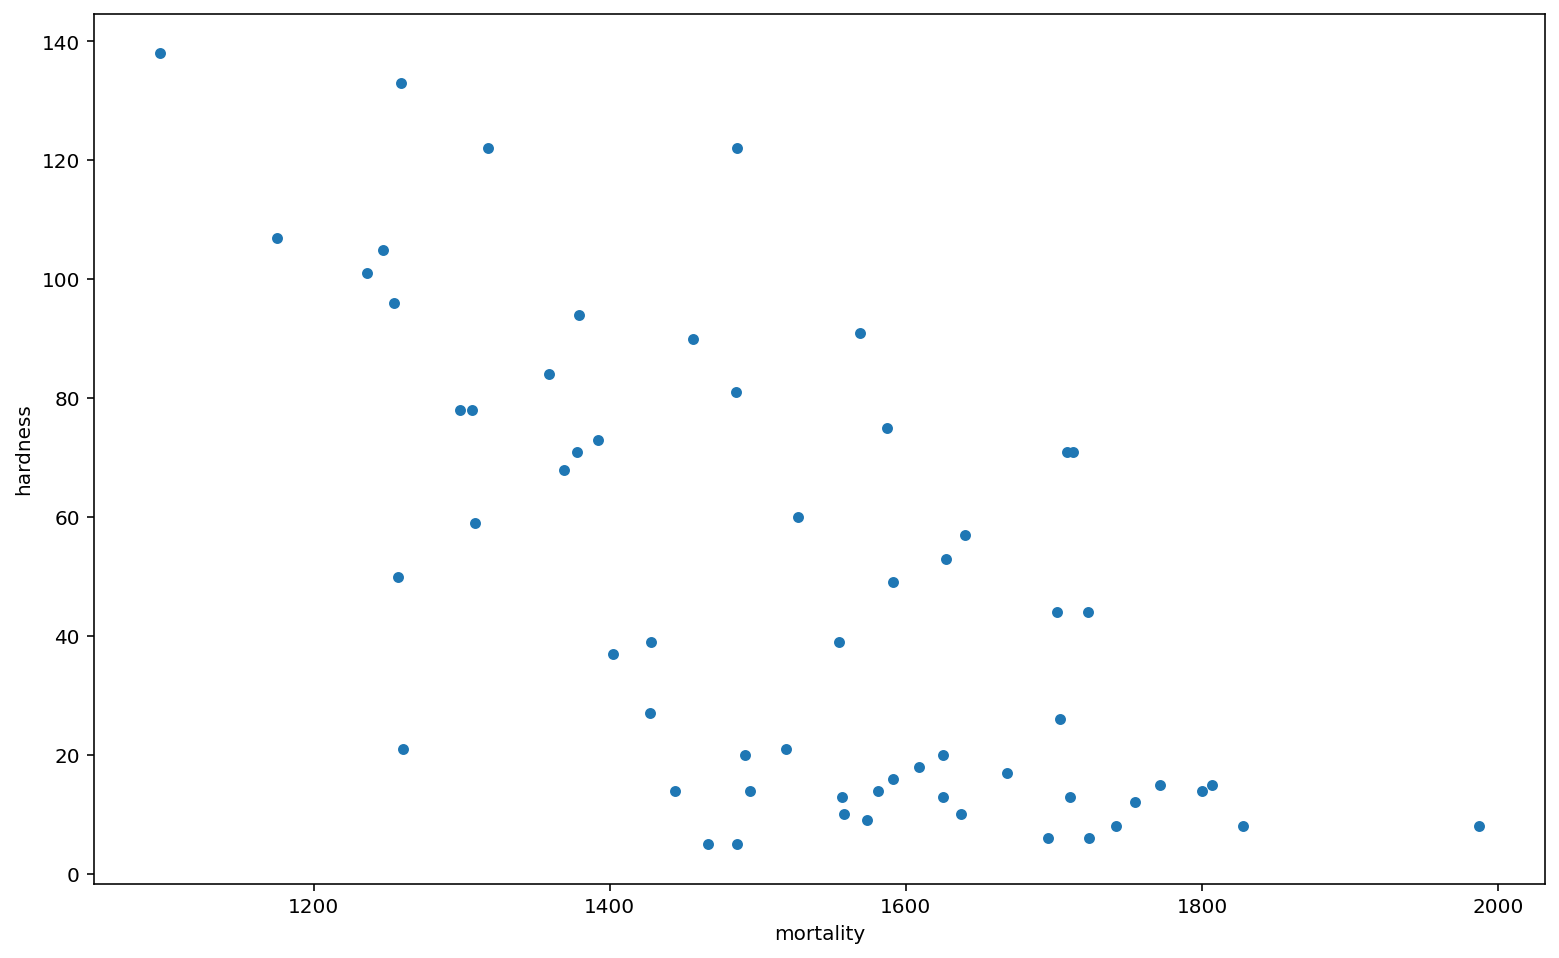

In [29]:
water.plot.scatter(x='mortality', y='hardness')

Рассчитаем коэффициент корреляции Пирсона

In [30]:
water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Рассчитаем коэффициент корреляции Спирмена

In [23]:
water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
x = water[['hardness']]
y = water['mortality']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(x_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

Рассчитаем коэффициент детерминации

In [39]:
model.score(x_test, y_test)

0.5046490611017092

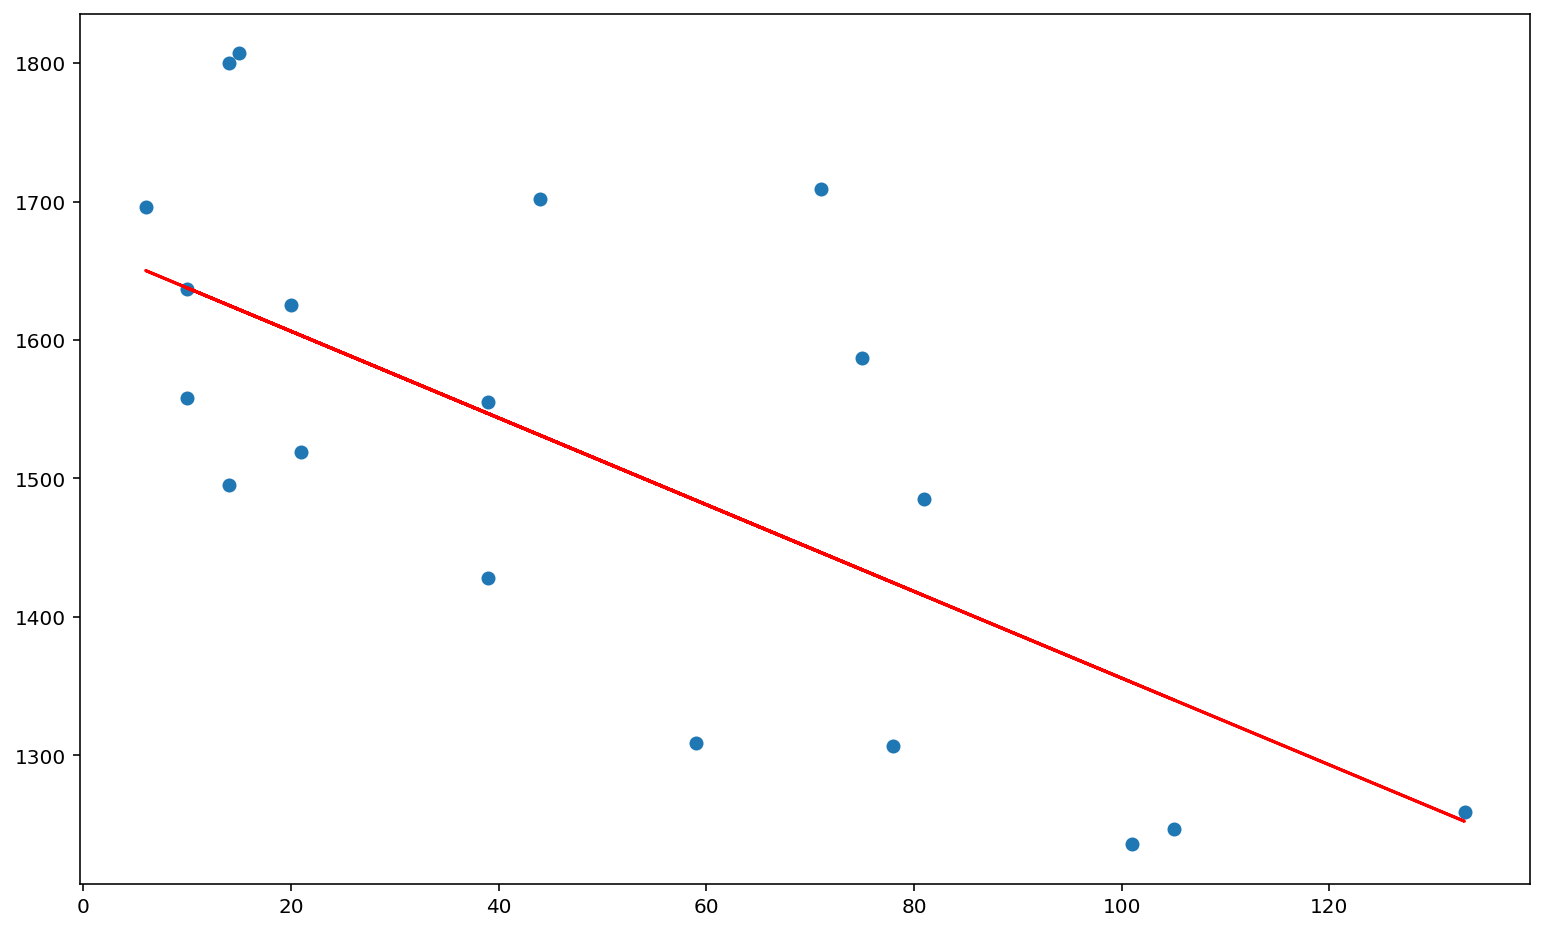

In [43]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

Построим график остатков

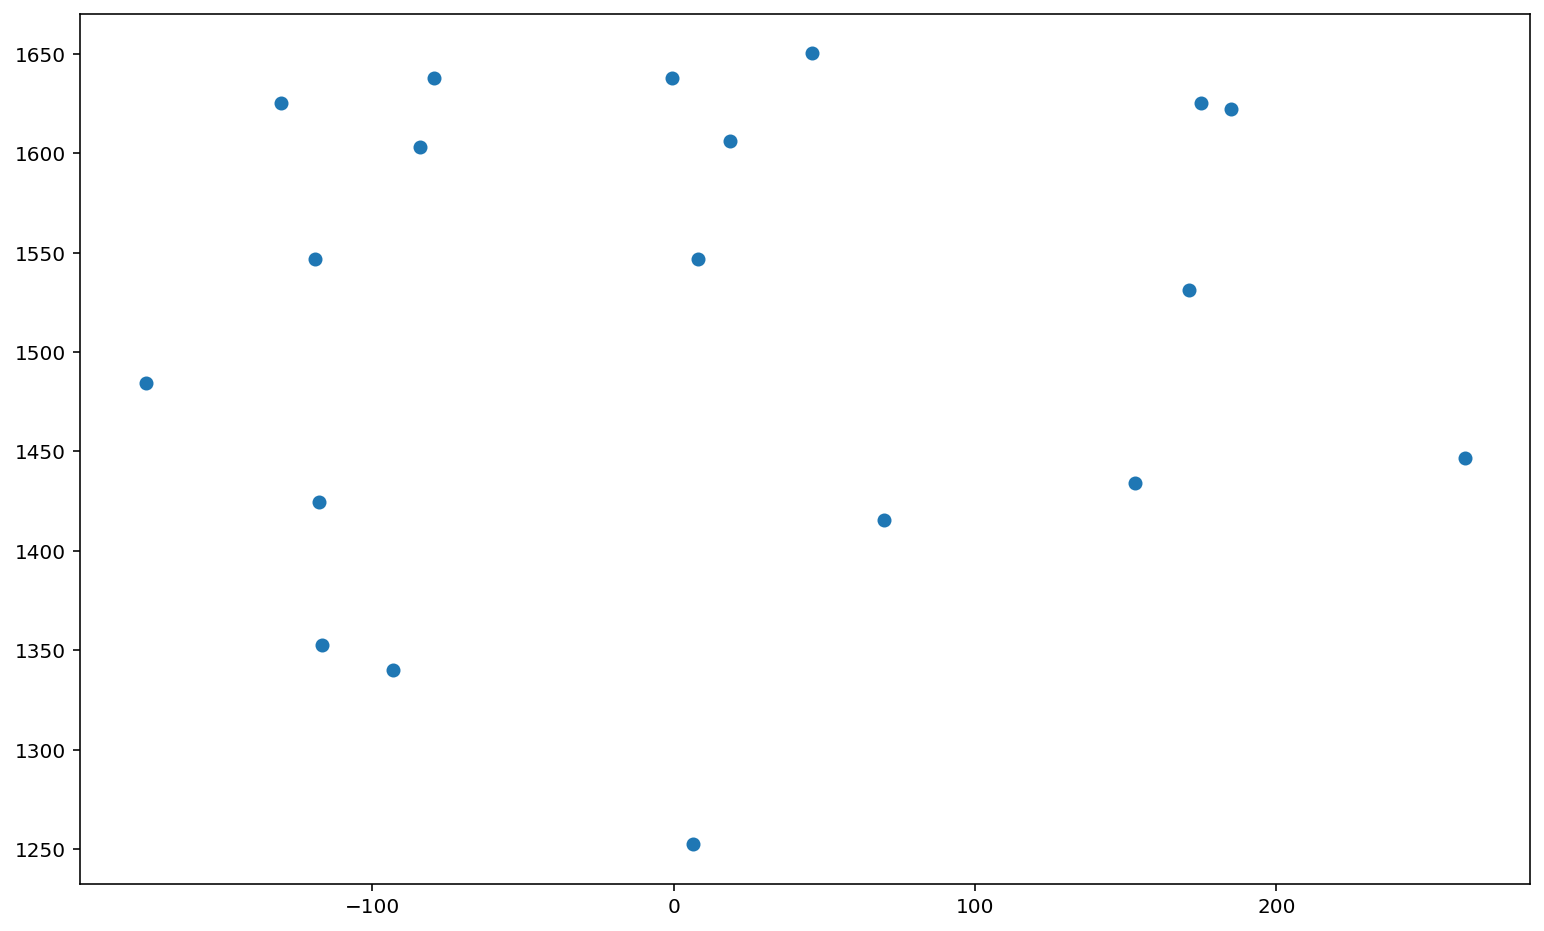

In [48]:
plt.scatter(y_test - y_pred, y_pred)

#### Вывод

Между жесткостью воды и средней годовой смертностью есть обратная зависимость, пусть и не очень высокая. Качество модели линейной регрессии достаточно среднее

### Задание 3. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [51]:
water_south = water[water.location == 'South']
water_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

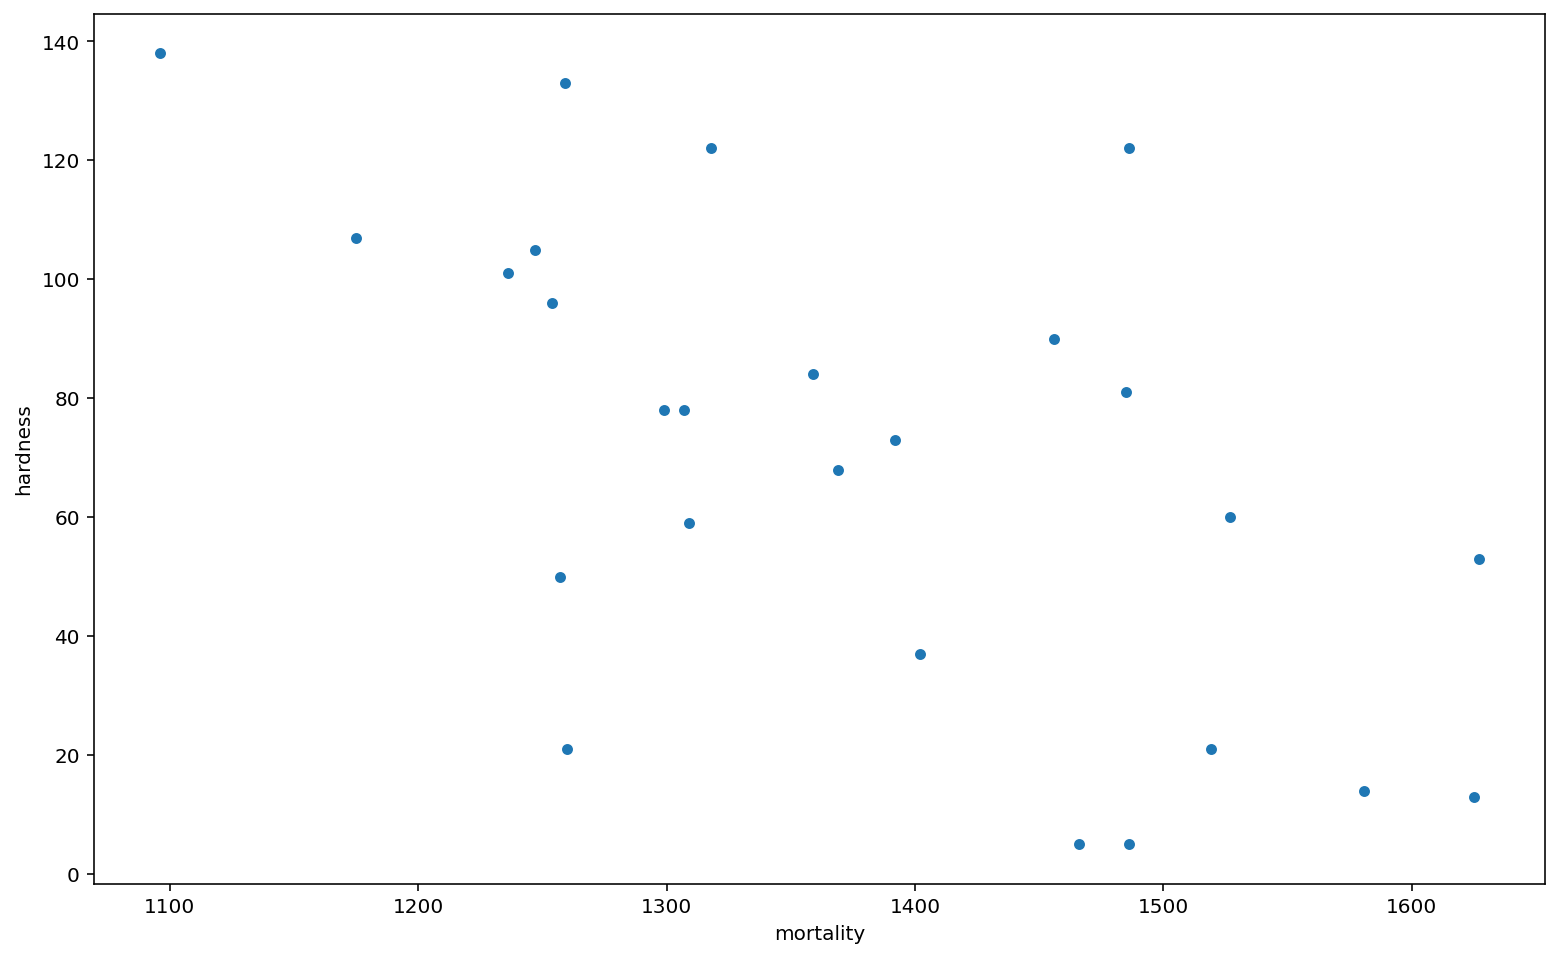

In [52]:
water_south.plot.scatter(x='mortality', y='hardness')

Рассчитаем коэффициент корреляции Пирсона

In [53]:
water_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


Рассчитаем коэффициент корреляции Спирмена

In [54]:
water_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [55]:
x = water_south[['hardness']]
y = water_south['mortality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(x_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

Рассчитаем коэффициент детерминации

In [57]:
model.score(x_test, y_test)

-2.5519223012352077

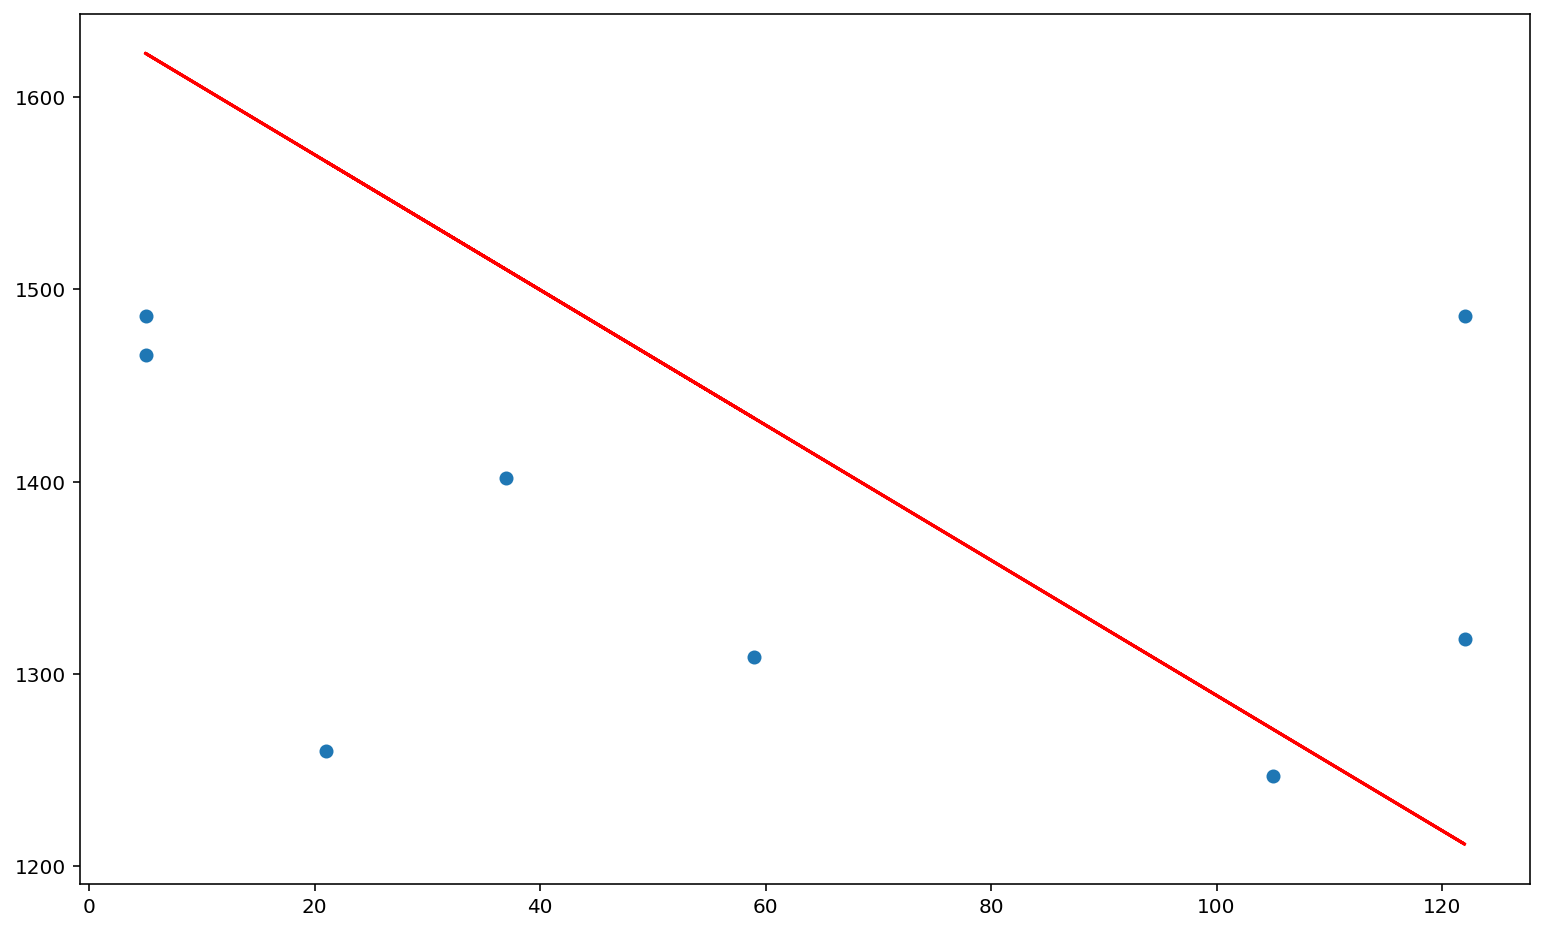

In [58]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

Построим график остатков

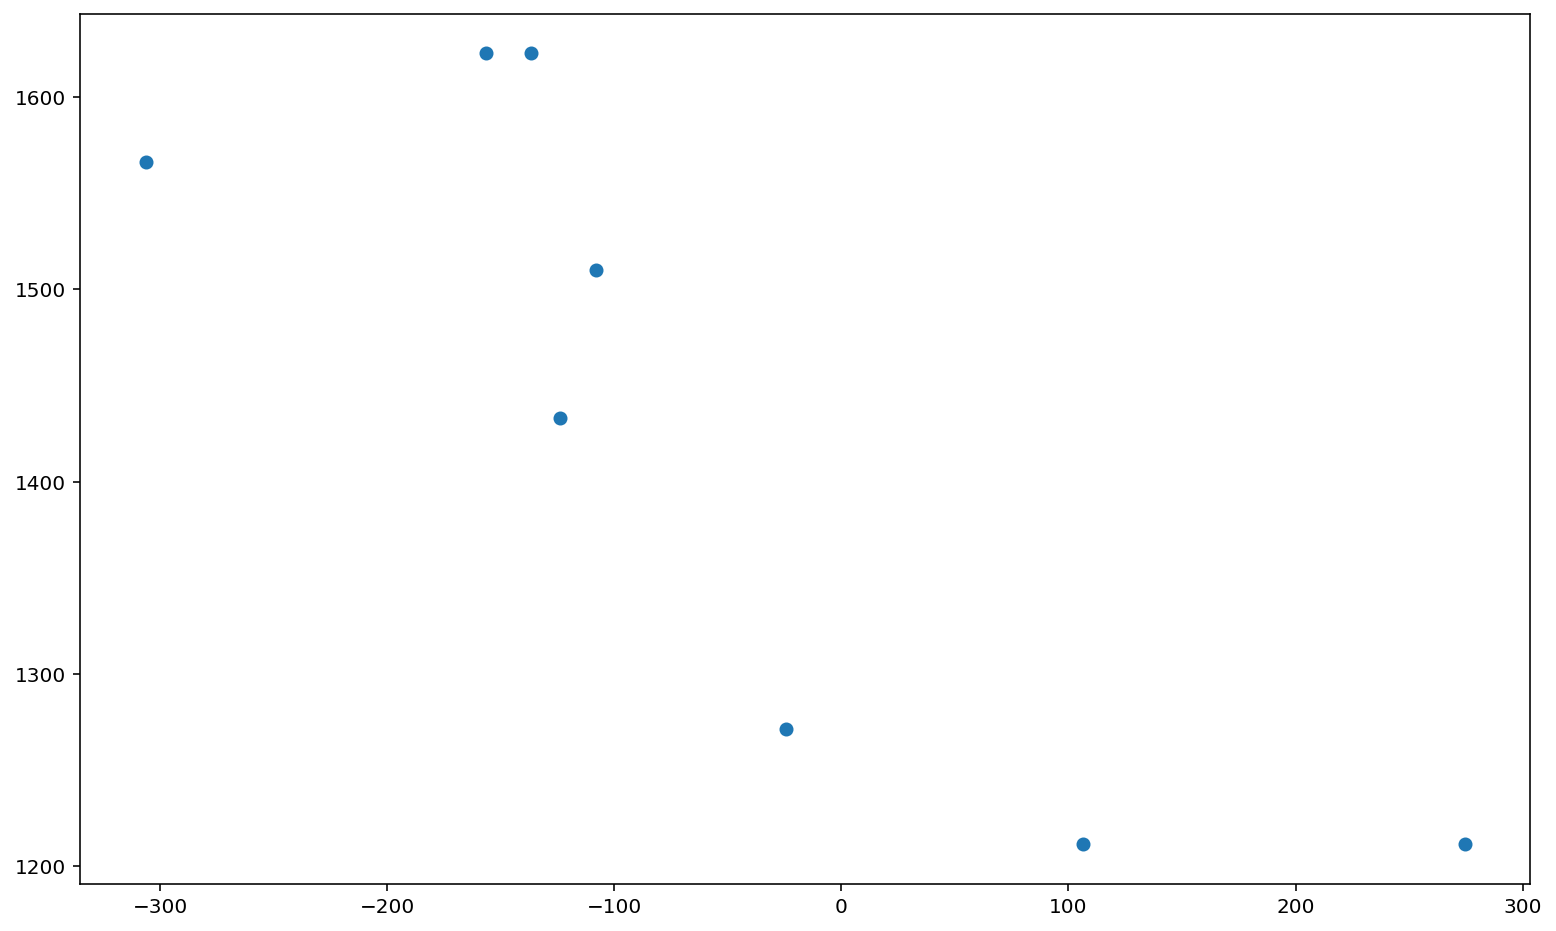

In [59]:
plt.scatter(y_test - y_pred, y_pred)

#### Вывод

Между жесткостью воды и средней годовой смертностью среди южных городов есть обратная зависимость, опять же не очень высокая. Качество модели линейной регрессии очень плохое

---

In [60]:
water_north = water[water.location == 'North']
water_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

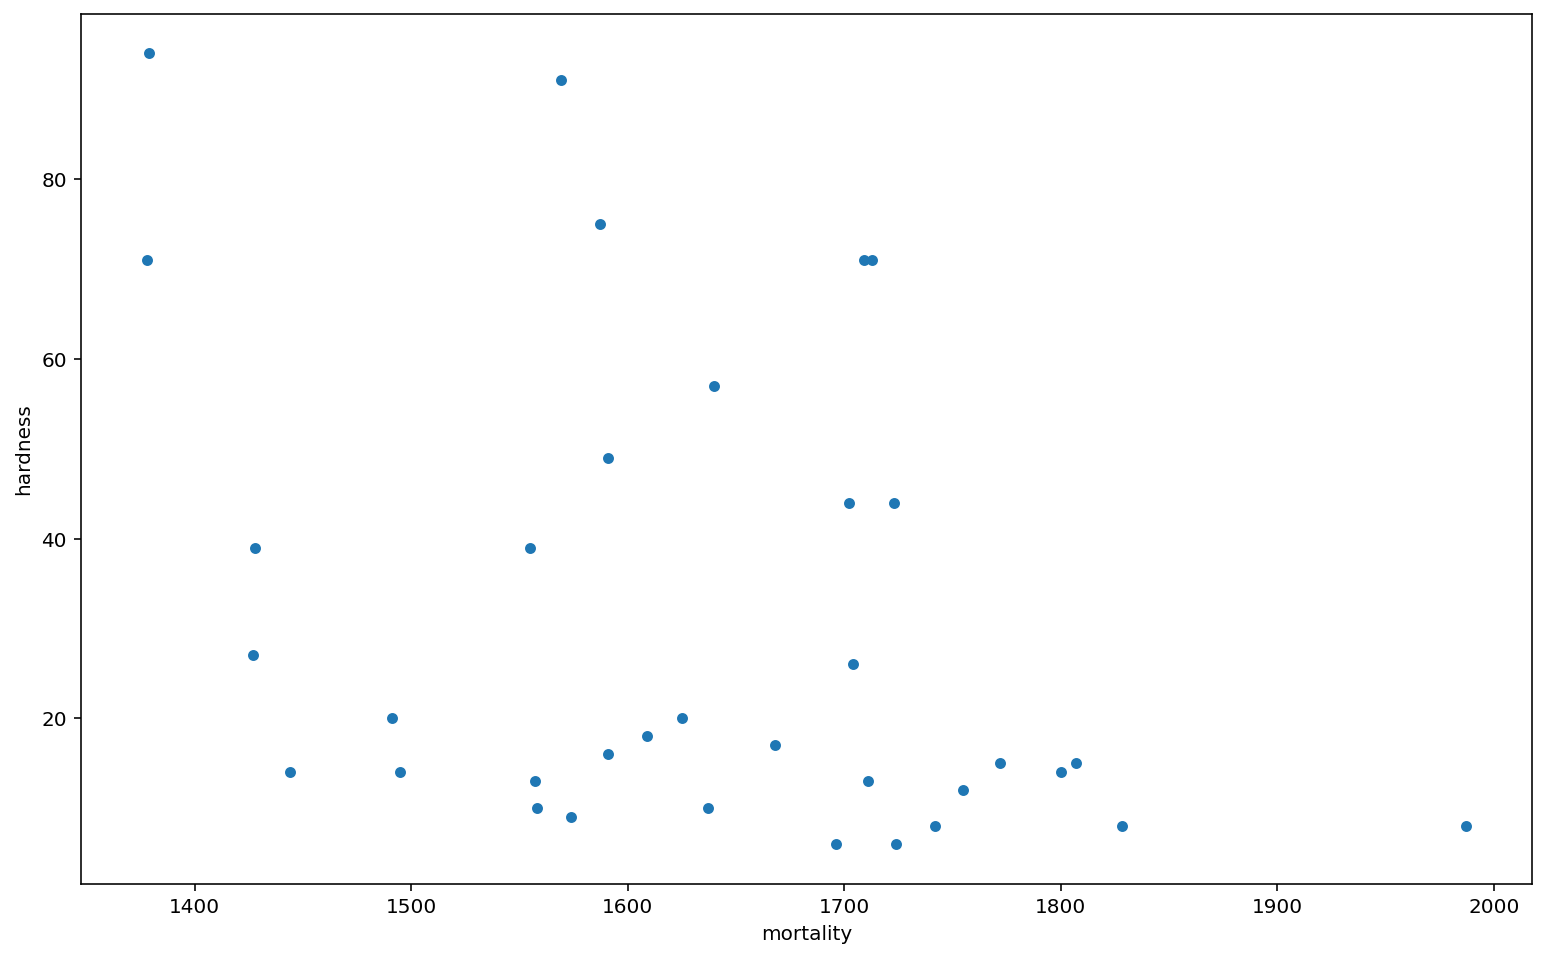

In [61]:
water_north.plot.scatter(x='mortality', y='hardness')

Рассчитаем коэффициент корреляции Пирсона

In [62]:
water_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


Рассчитаем коэффициент корреляции Спирмена

In [64]:
water_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [65]:
x = water_north[['hardness']]
y = water_north['mortality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(x_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

Рассчитаем коэффициент детерминации

In [67]:
model.score(x_test, y_test)

0.018885304285745863

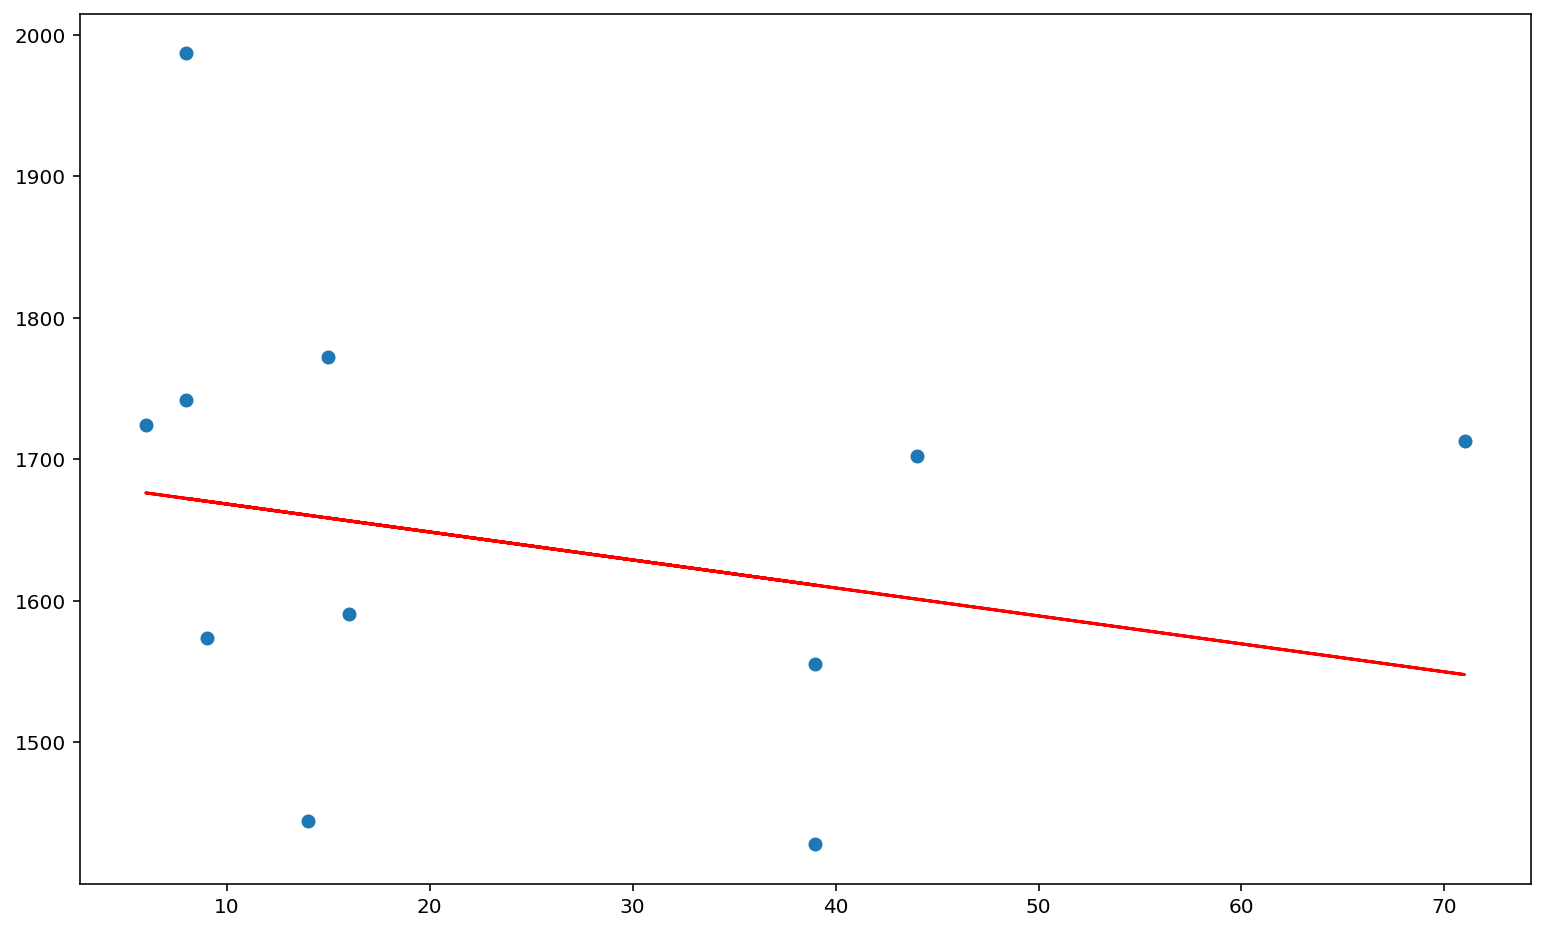

In [68]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

Построим график остатков

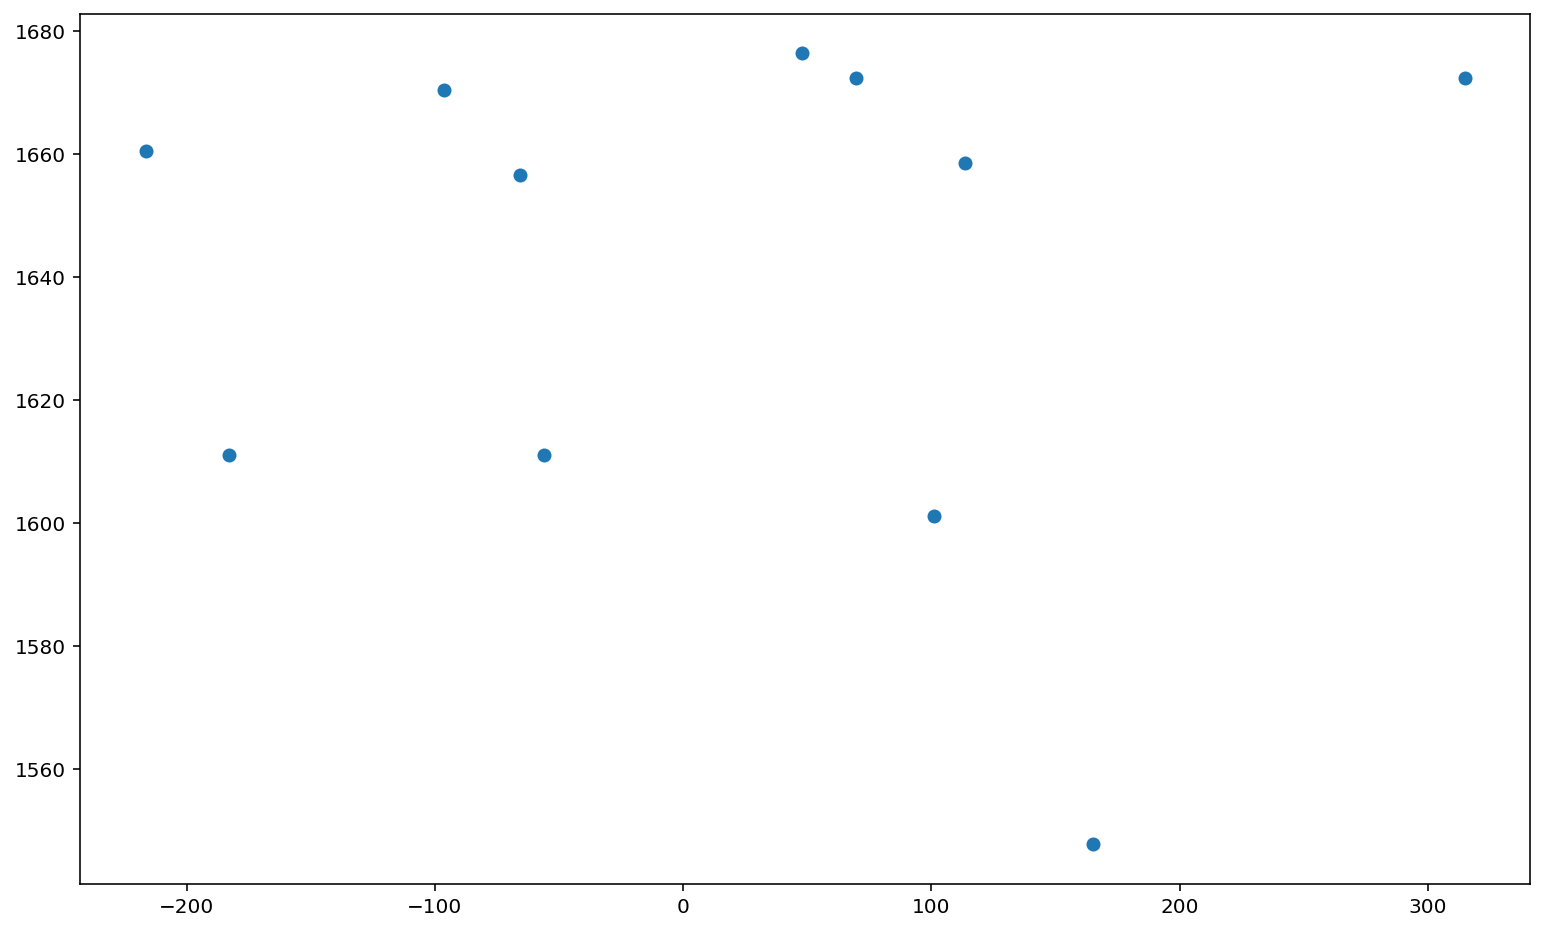

In [69]:
plt.scatter(y_test - y_pred, y_pred)

#### Вывод

Между жесткостью воды и средней годовой смертностью среди северных городов есть обратная зависимость и она невысокая. Качество модели линейной регрессии также плохое